# Lab 10. ARIMA 모델을 활용한 결측치 예측과 대처 실습
---

- ARIMA(자동 회귀 누적 이동 평균)는 시계열 데이터의 패턴을 파악하여 미래값을 예측하는 모델이다.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from statsmodels.tsa.arima.model import ARIMA

- 시계열 데이터를 생성하고 결측치를 생성한다. 그리고 생성한 결측치를 확인한다.

In [2]:
# 시계열 데이터 생성 
dates = pd.date_range(start='2023-01-01', periods=1000, freq='D')
values = np.random.randn(1000)

# 데이터 프레임워크 생성
data = pd.DataFrame({
    'Date' : dates,
    'Value' : values
})

# 결측치 생성 
data.loc[50:150, 'Value'] = np.nan

print(data.loc[50:150])

          Date  Value
50  2023-02-20    NaN
51  2023-02-21    NaN
52  2023-02-22    NaN
53  2023-02-23    NaN
54  2023-02-24    NaN
..         ...    ...
146 2023-05-27    NaN
147 2023-05-28    NaN
148 2023-05-29    NaN
149 2023-05-30    NaN
150 2023-05-31    NaN

[101 rows x 2 columns]


- ARIMA 모델을 활용하여 결측치를 예측하고 대처해본다.

In [3]:
model = ARIMA(data['Value'].dropna(), order=(1, 1, 1))
model_fit = model.fit()

# 결측치 예측 
predicted_values = model_fit.predict(start=50, end=2000)

print(predicted_values)

c:\Users\kss34\anaconda3\envs\myEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kss34\anaconda3\envs\myEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kss34\anaconda3\envs\myEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


50      0.048609
51      0.009647
52      0.064797
53      0.011942
54      0.050412
          ...   
1996    0.044513
1997    0.044513
1998    0.044513
1999    0.044513
2000    0.044513
Name: predicted_mean, Length: 1951, dtype: float64


c:\Users\kss34\anaconda3\envs\myEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


In [4]:
# 결측치 대처 
data.loc[50:150, 'value temp'] = predicted_values

print(data[50:150])

          Date  Value  value temp
50  2023-02-20    NaN    0.048609
51  2023-02-21    NaN    0.009647
52  2023-02-22    NaN    0.064797
53  2023-02-23    NaN    0.011942
54  2023-02-24    NaN    0.050412
..         ...    ...         ...
145 2023-05-26    NaN    0.043140
146 2023-05-27    NaN    0.029277
147 2023-05-28    NaN    0.019885
148 2023-05-29    NaN    0.032870
149 2023-05-30    NaN    0.038282

[100 rows x 3 columns]


- 시계열 데이터를 시각화 해본다.

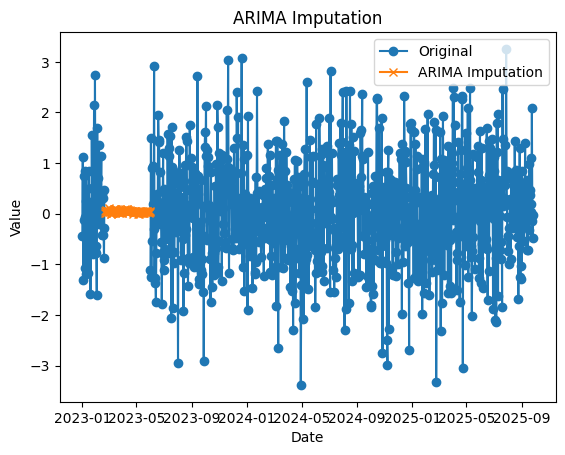

In [5]:
# 시계열 데이터 시각화
plt.plot(data['Date'], data['Value'], 'o-', label='Original')
plt.plot(data['Date'], data['value temp'], 'x-', label='ARIMA Imputation')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('ARIMA Imputation')
plt.legend()

plt.show()